# Make your own predictions

## Import libraries

In [1]:
import os
import sys

import matplotlib.pyplot as plt

sys.path.append('..')
import predictions
import utils

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Define function for plot predictions

In [2]:
def plot_results(data_to_predict,predictions, params):
    
    id_label_map = utils.load_id_label_map(params)
    
    num_images = len(data_to_predict) if len(data_to_predict)>1 else len(data_to_predict)+1
    
    fig, axis = plt.subplots(num_images,2, figsize=(20,20))
    
    images = data_to_predict[0]
    
    k = 0
    for i in range(len(data_to_predict)):

        axis[i][0].imshow(data_to_predict[k])
        axis[i][0].axis('off')

        pred = id_label_map[predictions[k]]
        axis[i][1].text(0.5, 0.5, pred, size=25, ha="center", va="center",
                bbox=dict(
                    boxstyle="round",
                    ec=(1., 0.5, 0.5),
                    fc=(1., 0.8, 0.8),
                )
               )
        axis[i][1].set_title('Prediction')
        axis[i][1].axis('off')
            
        k += 1
    plt.show()

## Define some parameters

In [3]:
params = utils.yaml_to_dict('config.yml')
params['batch_size'] = 10

## Build a ImageGenerator

At this point, maybe you think, Where I put my test images? The answer for this questions is very easy.

If you follow correctly the steps in Readme file, you must have a folder called *images_to_predict* inside this folder you should create other folder and called as you want (I recommend, *dummy_folder*).

In this new folder you could put all dog images that you want to identify their breeds. 

In [4]:
generator = predictions.data_generator(params)

Found 2 images belonging to 1 classes.


In [5]:
data_to_predict = next(generator)

## Make predictions

Only execute this line, you will have a set of 10 predictions. If you put more than 10 images in the folder, don't worry, execute the previous line and then, make new predictions.

In [6]:
preds = predictions.make_predictions(data_to_predict,params)

2/2 [==============================] - 3s 1s/step


## Plot predictions

Finally, executing this line you will show the model predictions.

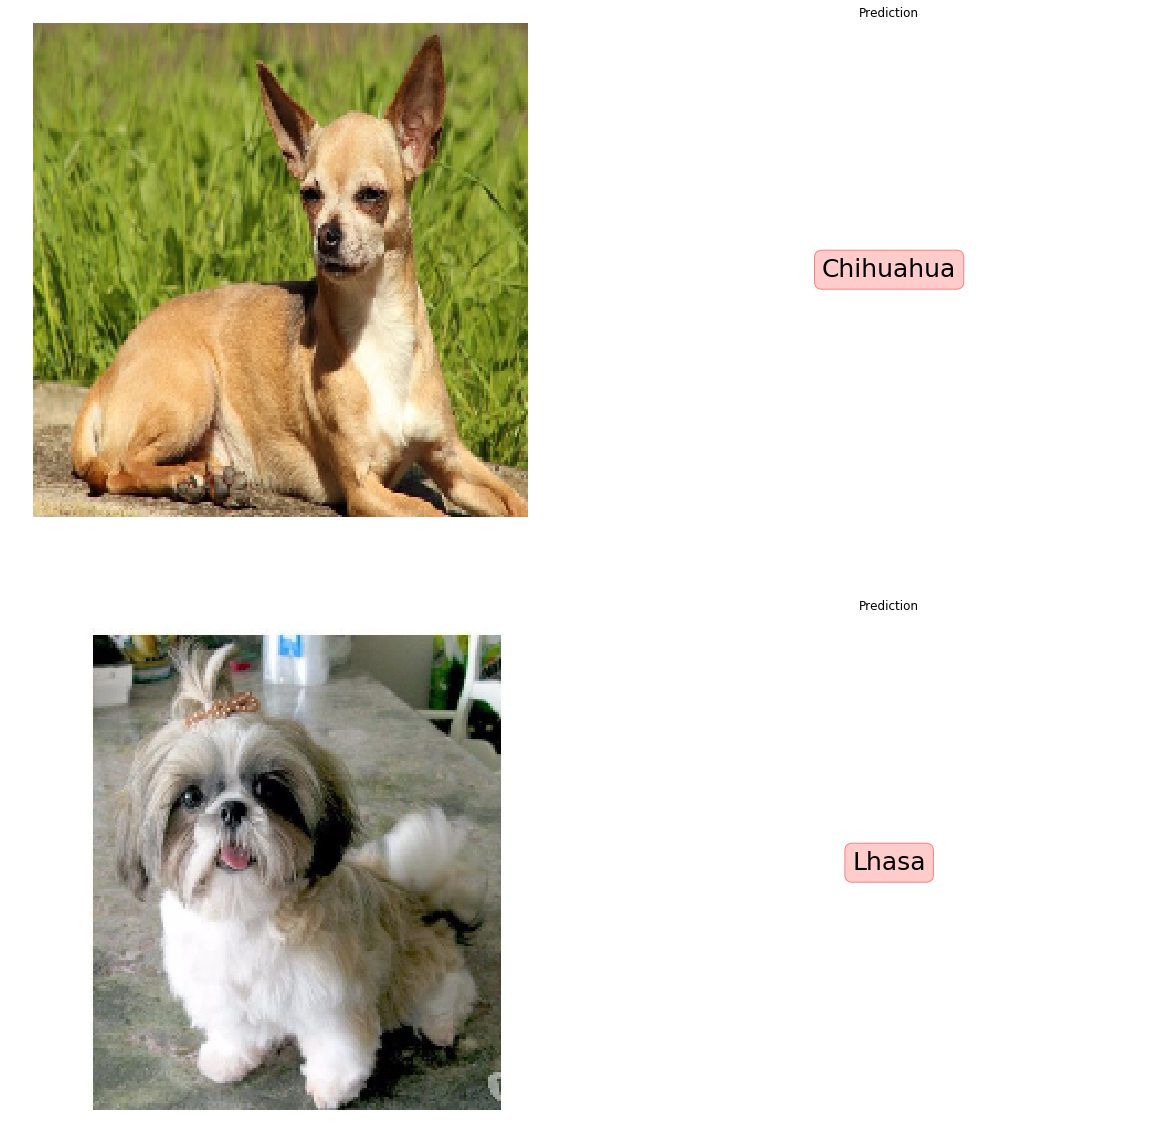

In [7]:
plot_results(data_to_predict,preds, params)

# Are the predictions good?

I would love to know your answer